# DeWatermark

In [1]:
import cv2
import numpy as np
from math import log10
import matplotlib.pyplot as plt

In [28]:
def mse(img1, img2):
    return np.mean((img1 - img2) ** 2)


def calculate_psnr(original, compared):
    mse_val = mse(original, compared)
    if mse_val == 0:
        return float('inf')
    return 20 * np.log10(255 / np.sqrt(mse_val))

In [24]:
def dewatermark(watermarked, watermark):
    alpha = watermark[ : , : , 3]   # استخراج کانال آلفا
    alpha = alpha[..., None]  
    original= watermarked - (watermark[:, :, :3] * (0.3 * alpha)) 
    original =original / (1 - 0.3 * alpha )
    return original

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.000848178..1.0028012].


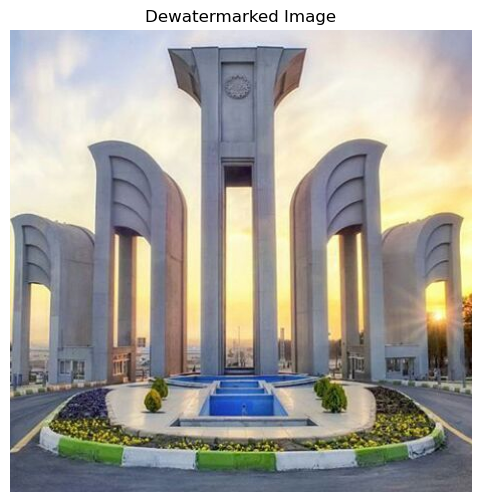

PSNR between dewatermarked and original: 107.28 dB


In [30]:
watermarked_path = "./images_part1/watermarked.png"
watermark_path = "./images_part1/iut.png"
original_path = "./images_part1/original.png"

watermarked = cv2.imread(watermarked_path).astype(np.float32) / 255.0
watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED).astype(np.float32) / 255.0
original = cv2.imread(original_path).astype(np.float32) / 255.0

dewatermarked =dewatermark(watermarked, watermark)
psnr_value = calculate_psnr(original, dewatermarked)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(dewatermarked, cv2.COLOR_BGR2RGB))
plt.title('Dewatermarked Image')
plt.axis('off')
plt.show()

print(f"PSNR between dewatermarked and original: {psnr_value:.2f} dB")